# **Prever a posição final do piloto em uma corrida.**

In [ ]:
import pandas as pd                                                             # biblioteca pandas(carregamento e manipulação de dados)
import numpy as np                                                              # biblioteca de operações matemáticas
import seaborn as sns                                                           # biblioteca de gráficos
import matplotlib.pyplot as plt                                                 # biblioteca de gráficos
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## **1. Coleta de dados**

In [ ]:
#carrega o arquivo csv do datast
df = pd.read_csv("/content/pit_stops.csv")          # diretorio do arquivo
df.head()                                                                       # mostra as primeiras linhas

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
#renomear colunas para o idioma portugues
df.rename(columns={
    "raceId": "Id_de_Corrida",
    "driverId": "Id_do_Piloto",
    "stop": "parada",
    "lap": "volta",
    "time": "tempo",
    "duration": "duração",
    "milliseconds": "milissegundos"
}, inplace=True)
df.head()

,Id_de_Corrida,Id_do_Piloto,parada,volta,tempo,duração,milissegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
#retorna a contagem de linhas para os valores un
#uma lista com os nomes das colunas é envida po
df[['Id_de_Corrida']].value_counts()

,count
Id_de_Corrida,
1111,101
936,96
851,88
982,82
970,82
...,...
941,19
1075,19
1056,19


In [ ]:
df[['Id_do_Piloto']].value_counts()

,count
Id_do_Piloto,
1,557
815,538
4,474
817,472
20,463
...,...
850,6
860,4
812,3


In [ ]:
df[['parada']].value_counts()

,count
parada,
1,5573
2,3716
3,1496
4,427
5,120
6,29
7,3
15,1
42,1


In [ ]:
df[['volta']].value_counts()

,count
volta,
1,404
13,325
11,318
12,309
28,308
...,...
70,4
72,2
73,2


In [ ]:
df[['tempo']].value_counts()

,count
tempo,
15:06:11,6
15:05:16,6
14:22:38,6
15:08:45,6
14:47:48,5
...,...
15:20:23,1
15:20:20,1
15:20:18,1


In [ ]:
df[['duração']].value_counts()

,count
duração,
22.534,8
22.684,7
22.745,7
22.399,6
22.963,6
...,...
13.199,1
13.186,1
13.173,1


In [ ]:
df[['milissegundos']].value_counts()

,count
milissegundos,
22534,8
22745,7
22684,7
22838,6
22105,6
...,...
2455302,1
2461612,1
2483382,1


In [ ]:
df=df[df['Id_do_Piloto'] <20]

In [ ]:
df=df[df['Id_de_Corrida'] <860]

In [ ]:
df.drop(columns=['tempo'], inplace=True)

In [ ]:
df['Id_de_Corrida'].unique()

array([841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853,
       854, 855, 856, 857, 858, 859])

In [ ]:
atributos_categoricos = ['Id_de_Corrida', 'Id_do_Piloto', 'parada']

In [ ]:
atributos_numericos = ['volta','milissegundos','parada']

In [ ]:
variaveis_cat_nominais = ['Id_de_Corrida', 'Id_do_Piloto']

In [ ]:
rotulo = 'duração'

In [ ]:
df[[rotulo]]=df[[rotulo]].astype(float)

In [ ]:
df.dtypes

,0
Id_de_Corrida,int64
Id_do_Piloto,int64
parada,int64
volta,int64
duração,float64
milissegundos,int64


In [ ]:
#move a coluna do rutulo para a ultima coluna do lado direito
#boa pratica para a visualizacao
coluna= df.pop(rotulo)
df.insert(5,rotulo,coluna)
df.head()

,Id_de_Corrida,Id_do_Piloto,parada,volta,milissegundos,duração
2,841,17,1,11,23426,23.426
3,841,4,1,12,23251,23.251
4,841,13,1,13,23842,23.842
10,841,2,1,15,22994,22.994
11,841,1,1,16,23227,23.227


## **2. Analise Exploratoria dos Dados**

###2.1 Indicadores

In [ ]:
df[atributos_numericos].describe()

,volta,milissegundos,parada
count,513.000000,513.000000,513.000000
mean,28.038986,23040.522417,1.988304
std,13.851417,3626.321846,0.970190
min,1.000000,13173.000000,1.000000
25%,16.000000,20975.000000,1.000000
50%,27.000000,22013.000000,2.000000
75%,39.000000,23812.000000,3.000000
max,69.000000,51684.000000,6.000000


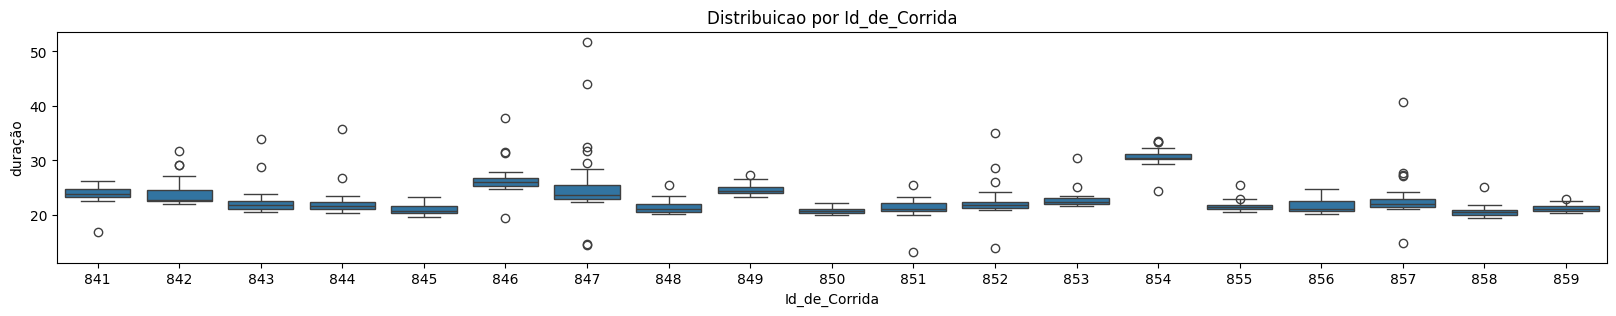

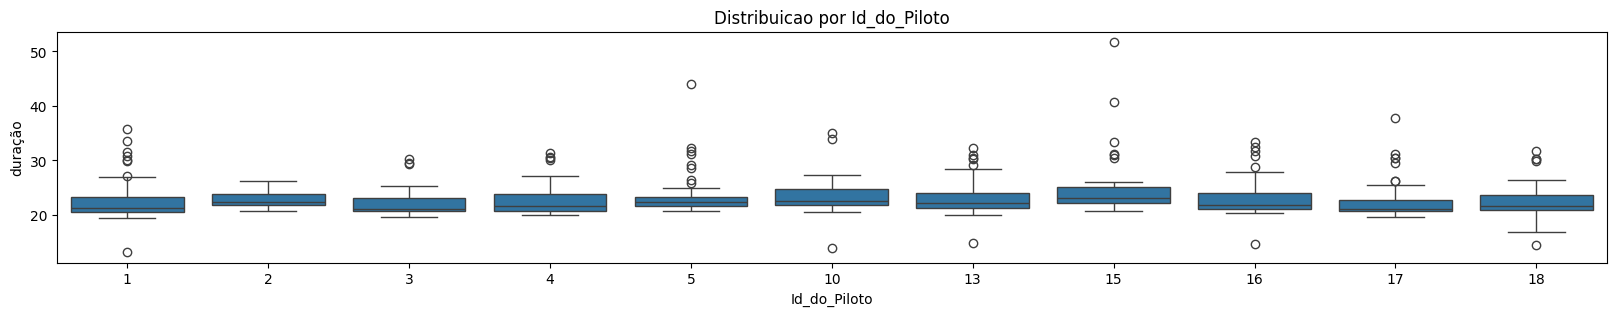

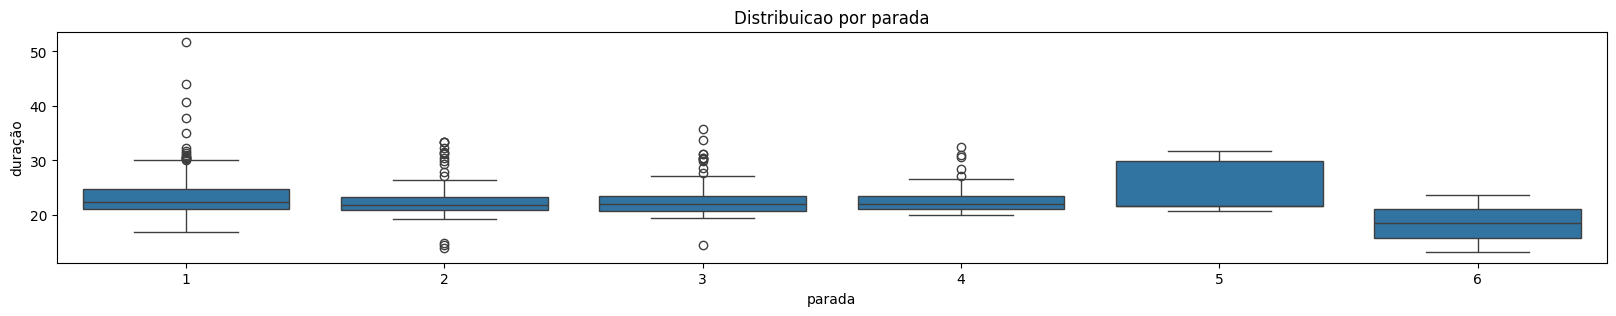

In [ ]:
for atributo_categorico in atributos_categoricos:
  plt.figure(figsize=(20,3))
  sns.boxplot(x=atributo_categorico, y=rotulo,data=df[[atributo_categorico,rotulo]])
  plt.title("Distribuicao por " + atributo_categorico)
  plt.show()
  #nao é necessario grafico, pois possui muitas informacao

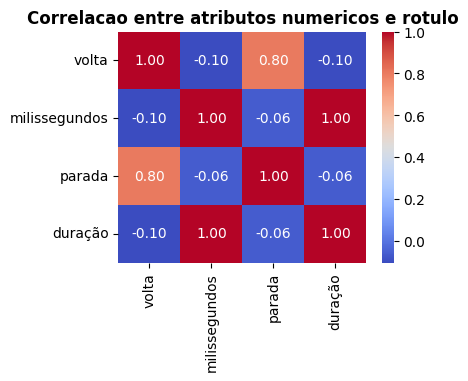

In [ ]:
plt.figure(figsize=(4,3))
matriz_corr=df[[atributo for atributo in atributos_numericos if atributo!="Tempo"]+[rotulo]].corr()
sns.heatmap(matriz_corr, annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Correlacao entre atributos numericos e rotulo",fontweight="bold")
plt.show()

## 3.Pré processamento

In [ ]:
#Remove amostras com dados faltantes
df_sem_NAN=df.dropna(axis=0) #remove linhas com dados faltantes
#NAN:not a number

In [ ]:
#Remove amostras duplicadas
df_sem_duplicata=df_sem_NAN.drop_duplicates()

In [ ]:
#dataframe após a limpeza de dados
df_limpo=df_sem_duplicata.copy()

###3.3 Transformação de variáveis categóricas

3.3.3 Variáveis categóricas nominais

In [ ]:
# transformação de variaveis categóricas nominais através da classe OneHotEncoder
# novas colunas a partir dos grupos existentes nos atributos categóricos
# será uma coluna nova para cada grupo
# isso garante que atributos categóricos nominais não tenham relação de grandeza
encoder       = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df_limpo[variaveis_cat_nominais])
novas_colunas = encoder.get_feature_names_out(variaveis_cat_nominais)

df_nominais_transformadas   = pd.DataFrame(encoded_array,
                                           columns=novas_colunas,
                                           index=df_limpo.index)

df_nominais_transformadas.head()

,Id_de_Corrida_841,Id_de_Corrida_842,Id_de_Corrida_843,Id_de_Corrida_844,Id_de_Corrida_845,Id_de_Corrida_846,Id_de_Corrida_847,Id_de_Corrida_848,Id_de_Corrida_849,Id_de_Corrida_850,...,Id_do_Piloto_2,Id_do_Piloto_3,Id_do_Piloto_4,Id_do_Piloto_5,Id_do_Piloto_10,Id_do_Piloto_13,Id_do_Piloto_15,Id_do_Piloto_16,Id_do_Piloto_17,Id_do_Piloto_18
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_transformado=pd.concat(
                            [df_limpo[atributos_numericos],
                             df_nominais_transformadas,
                             df_limpo[rotulo]],
                             axis=1
                          )
df_transformado.head()

,volta,milissegundos,parada,Id_de_Corrida_841,Id_de_Corrida_842,Id_de_Corrida_843,Id_de_Corrida_844,Id_de_Corrida_845,Id_de_Corrida_846,Id_de_Corrida_847,...,Id_do_Piloto_3,Id_do_Piloto_4,Id_do_Piloto_5,Id_do_Piloto_10,Id_do_Piloto_13,Id_do_Piloto_15,Id_do_Piloto_16,Id_do_Piloto_17,Id_do_Piloto_18,duração
2,11,23426,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.426
3,12,23251,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.251
4,13,23842,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.842
10,15,22994,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.994
11,16,23227,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.227


### 3.4 Padronização (Z-score)

In [ ]:
#converte as colunas para float, pois auxilia na conversao z-score e no treinamento
df_float = df_transformado.astype(float)

In [ ]:
df_preprocessado_nao_padronizado = df_float.copy()

In [ ]:
# Padronização (Z-score) das variáveis numéricas
# garante que as variáveis numéricas estejam na mesma escala
scaler = StandardScaler()

df_preprocessado_padronizado = df_preprocessado_nao_padronizado.copy()
z = scaler.fit_transform(df_preprocessado_nao_padronizado[atributos_numericos])
df_preprocessado_padronizado.loc[:, atributos_numericos] = z

df_preprocessado_padronizado.head()

,volta,milissegundos,parada,Id_de_Corrida_841,Id_de_Corrida_842,Id_de_Corrida_843,Id_de_Corrida_844,Id_de_Corrida_845,Id_de_Corrida_846,Id_de_Corrida_847,...,Id_do_Piloto_3,Id_do_Piloto_4,Id_do_Piloto_5,Id_do_Piloto_10,Id_do_Piloto_13,Id_do_Piloto_15,Id_do_Piloto_16,Id_do_Piloto_17,Id_do_Piloto_18,duração
2,-1.231327,0.106404,-1.019665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.426
3,-1.159061,0.058098,-1.019665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.251
4,-1.086796,0.221232,-1.019665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.842
10,-0.942266,-0.012842,-1.019665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.994
11,-0.870000,0.051474,-1.019665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.227


## 4. Divisão de dados
Divisão dos dados em Treino e Teste para os treinamentos

In [ ]:
#lista com nomes dos atributos após o pré-processamento
atributos=df_preprocessado_padronizado.drop(columns=[rotulo]).columns.to_list()

###4.1 Não padronizados

In [ ]:
#Divide os dados não padronizados em treino (70%) e teste(30%)
#alguns modelos (Árvore de decisão, Random Forest e outros) utilizam dados NÃO padoronizados
divisao_nao_padronizado = train_test_split(df_preprocessado_nao_padronizado[atributos],
                                           df_preprocessado_nao_padronizado[rotulo],
                                           test_size=0.3,
                                           random_state=42)
atributos_treino_nao_pad, atributos_teste_nao_pad, rotulo_treino_nao_pad, rotulo_teste_nao_pad = divisao_nao_padronizado

###4.2 Padronizados

In [ ]:
# Divide os dados padronizados em treino(70%) e teste(30%)
# alguns modelos (SVM, k-NN, Redes Neurais e outros) utilizam dados padronizados no treino
divisao_padronizado = train_test_split(df_preprocessado_padronizado[atributos],
                                       df_preprocessado_padronizado[rotulo],
                                       test_size=0.3,
                                       random_state=42)
atributos_treino_pad, atributos_teste_pad, rotulo_treino_pad, rotulo_teste_pad = divisao_padronizado

## 5. Construção dos modelos e treinos

### 5.1 Modelo Árvore de Decisão (Decision Tree)

In [ ]:
# Instância da Árvore de decisão
decision_tree_regressor = DecisionTreeRegressor(random_state = 42)

In [ ]:
# Hiperparâmetros do Grid Search CV
# GridSearchCV testa diversos hiperparâmetros no treinamento. Após isso, encontra os melhores parâmetros

param_grid_ad = {
    'criterion'         : ['gini', 'entropy'],      #critérios de divisão de dados
    'max_depth'         : [6, 8 , 10],              #máximo de camadas
    'min_samples_split' : [6, 8 , 10, 12],          #mínimo de amostras para divisão
    'min_samples_leaf'  : [6, 8],                   #mínimo de amostras em uma folha
    'max_features'      : [None, 'sqrt', 'log2']    #método para definir máximo de atributos
}

In [ ]:
# Hiperparâmetros do Grid Search CV
# GridSearchCV testa diversos hiperparâmetros no treinamento. Após isso, encontra os melhores parâmetros

param_grid_ad = {
    'criterion'         : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],      #critérios de divisão de dados para regressão
    'max_depth'         : [6, 8 , 10],              #máximo de camadas
    'min_samples_split' : [6, 8 , 10, 12],          #mínimo de amostras para divisão
    'min_samples_leaf'  : [6, 8],                   #mínimo de amostras em uma folha
    'max_features'      : [None, 'sqrt', 'log2']    #método para definir máximo de atributos
}

In [ ]:
# Instância do GridSearchCV (Árvore de decisão)
grid_search_ad = GridSearchCV(
    estimator=decision_tree_regressor, #instância da árvore de decisão
    param_grid=param_grid_ad,           #parâmetros Grid search CV
    cv=5,                               #cross-validation
    scoring='neg_mean_squared_error',   #métrica de validação para regressão
    n_jobs=-1,                          #CPU's utilizadas
    verbose=3                           #mensagens durante o treino
)

In [ ]:
# Treino
# Árvore de decisão utiliza dados NÃO padronizados no treinamento
grid_search_ad.fit(atributos_treino_nao_pad, rotulo_treino_nao_pad)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
print(f"Melhores parâmetros encontrados para Árvore de decisão: {grid_search_ad.best_params_}")

In [ ]:
#rótulos preditos pelo teste
rotulo_predito_ad = grid_search_ad.predict(atributos_teste_nao_pad)

In [ ]:
# Calculate regression metrics
mse = mean_squared_error(rotulo_teste_nao_pad, rotulo_predito_ad)
rmse = np.sqrt(mse)
mae = mean_absolute_error(rotulo_teste_nao_pad, rotulo_predito_ad)
r2 = r2_score(rotulo_teste_nao_pad, rotulo_predito_ad)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
# Diagrama da Árvore de Decisão
# Árvore de decisão utiliza dados NÃO padronizados no treinamento
plt.figure(figsize=(170, 12))

plot_tree(grid_search_ad.best_estimator_,
          feature_names=grid_search_ad.best_estimator_.feature_names_in_,
          filled=True,
          rounded=True,
          fontsize=5)

plt.title('Árvore de decisão', fontsize=16)
plt.show()

In [ ]:
# métrica R²
r2_ad = r2_score(rotulo_teste_nao_pad, rotulo_predito_ad) * 100.0
print('R² (Árvore de Decisão): ' + str(round(r2_ad,2)) + '%')

In [ ]:
# métrica RMSE(Root Mean Squared Erro)
rmse_ad = np.sqrt(mse)
print('RMSE (Árvore de Decisão): ' + str(round(rmse_ad,2)) + ' dólares')

In [ ]:
# métrica MAE(Mean Absolute Error)
mae_ad = mean_absolute_error(rotulo_teste_nao_pad, rotulo_predito_ad)
print('MAE (Árvore de Decisão): ' + str(round(mae_ad,2)) + ' dólares')